In [91]:
# APP IMPORT

In [92]:
import pandas as pd
import numpy as np

In [93]:
#LOAD DATASET

In [94]:
df = pd.read_csv('tbl_sale.csv')

In [95]:
df.describe(include='all')

,sale_id,sale_customer,sale_total,sale_paid,sale_due,sale_date,sale_status,sale_number,sale_person,sale_company,sale_shop
count,1332.000000,1332.000000,1.332000e+03,1.332000e+03,1332,1332,1332.000000,1332,1332.000000,1332.000000,1332.0
unique,NaN,NaN,NaN,NaN,611,591,NaN,1321,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,2021-09-26,2021-09-11,NaN,SRM-20210904-SALE-261,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,20,20,NaN,2,NaN,NaN,NaN
mean,696.268018,1.582583,2.638099e+05,2.556448e+05,NaN,NaN,7.203453,NaN,13.119369,4.960961,0.0
std,388.232982,3.432938,3.287214e+05,3.254058e+05,NaN,NaN,1.634035,NaN,1.040148,0.422836,0.0
min,1.000000,1.000000,1.000000e+03,0.000000e+00,NaN,NaN,4.000000,NaN,1.000000,0.000000,0.0
25%,365.750000,1.000000,4.500000e+04,4.000000e+04,NaN,NaN,8.000000,NaN,13.000000,5.000000,0.0
50%,698.500000,1.000000,1.400000e+05,1.255000e+05,NaN,NaN,8.000000,NaN,13.000000,5.000000,0.0
75%,1031.250000,1.000000,3.550000e+05,3.476250e+05,NaN,NaN,8.000000,NaN,13.000000,5.000000,0.0


In [96]:
drop_columns = ['sale_id','sale_customer','sale_due','sale_status','sale_number','sale_person','sale_company','sale_shop','sale_paid']

In [97]:
df_1 = df.drop(columns=drop_columns)

In [98]:
df_1.to_csv('sales.csv', index=False)

In [99]:
df = pd.read_csv('sales.csv')

In [100]:
min(df['sale_date'])

'0000-00-00'

In [101]:
invalid_sales_dates = df[df['sale_date'] > '0000-00-00']

In [102]:
invalid_sales_dates

,sale_total,sale_date
0,162500.0,2021-01-24
1,562500.0,2021-01-24
2,225000.0,2021-02-07
3,18750.0,2021-02-14
4,25000.0,2021-02-21
...,...,...
1327,885000.0,2022-11-17
1328,1455000.0,2022-11-18
1329,1040000.0,2022-11-19
1330,240000.0,2022-11-19


In [103]:
invalid_sales_dates.to_csv('sales_removed_invalid_sales_date.csv', index=False)

In [104]:
df = pd.read_csv('sales_removed_invalid_sales_date')

In [105]:
df

,sale_total,sale_date
0,162500.0,2021-01-24
1,562500.0,2021-01-24
2,225000.0,2021-02-07
3,18750.0,2021-02-14
4,25000.0,2021-02-21
...,...,...
1325,885000.0,2022-11-17
1326,1455000.0,2022-11-18
1327,1040000.0,2022-11-19
1328,240000.0,2022-11-19


In [106]:
min(df['sale_date'])

'2021-01-01'

In [107]:
max(df['sale_date'])

'2022-11-26'

In [108]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [109]:
df.set_index('sale_date', inplace=True)

In [110]:
df['sale_month'] = df.index.month

In [111]:
df

,sale_total,sale_month
sale_date,,
2021-01-24,162500.0,1
2021-01-24,562500.0,1
2021-02-07,225000.0,2
2021-02-14,18750.0,2
2021-02-21,25000.0,2
...,...,...
2022-11-17,885000.0,11
2022-11-18,1455000.0,11
2022-11-19,1040000.0,11


In [112]:
df['sale_month'] = df.index.month

In [113]:
df['sale_month']

sale_date
2021-01-24     1
2021-01-24     1
2021-02-07     2
2021-02-14     2
2021-02-21     2
              ..
2022-11-17    11
2022-11-18    11
2022-11-19    11
2022-11-19    11
2022-11-20    11
Name: sale_month, Length: 1330, dtype: int64

In [114]:
#df['sale_year'] = df['sale_date'].dt.year
df['sale_year'] = df.index.year

In [115]:
df['sale_day'] = df.index.day

In [116]:
df['sale_week'] = df.index.isocalendar().week

In [117]:
df

,sale_total,sale_month,sale_year,sale_day,sale_week
sale_date,,,,,
2021-01-24,162500.0,1,2021,24,3
2021-01-24,562500.0,1,2021,24,3
2021-02-07,225000.0,2,2021,7,5
2021-02-14,18750.0,2,2021,14,6
2021-02-21,25000.0,2,2021,21,7
...,...,...,...,...,...
2022-11-17,885000.0,11,2022,17,46
2022-11-18,1455000.0,11,2022,18,46
2022-11-19,1040000.0,11,2022,19,46


In [143]:
monthly_sales = df.resample('M').sum()

In [150]:
monthly_sales

,sale_total,sale_month,sale_year,sale_day,sale_week
sale_date,,,,,
2021-01-31,6954400.0,32,64672,397,531
2021-02-28,4087850.0,56,56588,401,180
2021-03-31,4001000.0,78,52546,444,285
2021-04-30,5269000.0,112,56588,454,426
2021-05-31,5828000.0,150,60630,475,582
2021-06-30,8530000.0,174,58609,454,693
2021-07-31,21810000.0,280,80840,722,1138
2021-08-31,35878500.0,1456,367822,3117,5969
2021-09-30,16218000.0,1935,434515,3127,7914


In [151]:
monthly_sales.to_csv('sale_monthly_sales.csv')

In [152]:
monthly_sales

,sale_total,sale_month,sale_year,sale_day,sale_week
sale_date,,,,,
2021-01-31,6954400.0,32,64672,397,531
2021-02-28,4087850.0,56,56588,401,180
2021-03-31,4001000.0,78,52546,444,285
2021-04-30,5269000.0,112,56588,454,426
2021-05-31,5828000.0,150,60630,475,582
2021-06-30,8530000.0,174,58609,454,693
2021-07-31,21810000.0,280,80840,722,1138
2021-08-31,35878500.0,1456,367822,3117,5969
2021-09-30,16218000.0,1935,434515,3127,7914


In [159]:
df = pd.read_csv('sale_monthly_sales.csv')

In [160]:
df

,sale_date,sale_total,sale_month,sale_year,sale_day,sale_week
0,2021-01-31,6954400.0,32,64672,397,531
1,2021-02-28,4087850.0,56,56588,401,180
2,2021-03-31,4001000.0,78,52546,444,285
3,2021-04-30,5269000.0,112,56588,454,426
4,2021-05-31,5828000.0,150,60630,475,582
5,2021-06-30,8530000.0,174,58609,454,693
6,2021-07-31,21810000.0,280,80840,722,1138
7,2021-08-31,35878500.0,1456,367822,3117,5969
8,2021-09-30,16218000.0,1935,434515,3127,7914
9,2021-10-31,17627000.0,720,145512,961,2943


In [161]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [163]:
df.set_index('sale_date', inplace=True)

In [164]:
df

,sale_total,sale_month,sale_year,sale_day,sale_week
sale_date,,,,,
2021-01-31,6954400.0,32,64672,397,531
2021-02-28,4087850.0,56,56588,401,180
2021-03-31,4001000.0,78,52546,444,285
2021-04-30,5269000.0,112,56588,454,426
2021-05-31,5828000.0,150,60630,475,582
2021-06-30,8530000.0,174,58609,454,693
2021-07-31,21810000.0,280,80840,722,1138
2021-08-31,35878500.0,1456,367822,3117,5969
2021-09-30,16218000.0,1935,434515,3127,7914


In [167]:
df['sale_month'] = df.index.month
df['sale_year'] = df.index.year

In [168]:
df

,sale_total,sale_month,sale_year,sale_day,sale_week
sale_date,,,,,
2021-01-31,6954400.0,1,2021,397,531
2021-02-28,4087850.0,2,2021,401,180
2021-03-31,4001000.0,3,2021,444,285
2021-04-30,5269000.0,4,2021,454,426
2021-05-31,5828000.0,5,2021,475,582
2021-06-30,8530000.0,6,2021,454,693
2021-07-31,21810000.0,7,2021,722,1138
2021-08-31,35878500.0,8,2021,3117,5969
2021-09-30,16218000.0,9,2021,3127,7914


In [127]:
import matplotlib.pyplot as plt


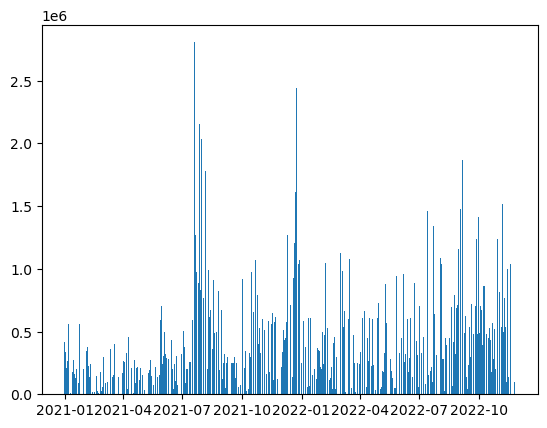

In [135]:
plt.bar(df.index,df['sale_total'])
plt.show()

In [170]:
from sklearn.model_selection import train_test_split

# Create features and target
X = df[['sale_month','sale_year']].values
y = df['sale_total'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [171]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 5091009.174455071


In [172]:
y_pred

array([19674475.31152725, 21748487.3052969 , 23822499.29906559,
       25896511.29283524, 27970523.28660488])